In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys

sys.path.append('../modules/')

import funAdapt as fa

import pandas as pd

In [4]:
def load_from_mathematica(filename):
    db = pd.read_csv(filename, header = None)
    db = db.map(lambda x: str(x))
    db = db.map(lambda x: x.strip('{}'))

    db = db.map(lambda x: x.replace('*^', 'e'))

    db = db.map(lambda x: float(x))
    return db.values.T

def load_countour_from_mathematica(filename):
    x, y, vals = load_from_mathematica(filename)
    xvals = np.unique(x)
    yvals = np.unique(y)

    mat = np.zeros((len(xvals), len(yvals)))

    for i, xval in enumerate(xvals):
        mat[i] = vals[x == xval]

    return xvals, yvals, mat

In [5]:
sys.path.append('../../lib/')
import funPlots as fplot

import cmasher

fplot.master_format(ncols = 2, nrows = 1)

In [139]:
theta_eta = 50
Lambda = 0.9

sigma_array = np.array([0.25, 10, 75, 500])

amax_array = np.array([2, 2, 0.2, 0.053])

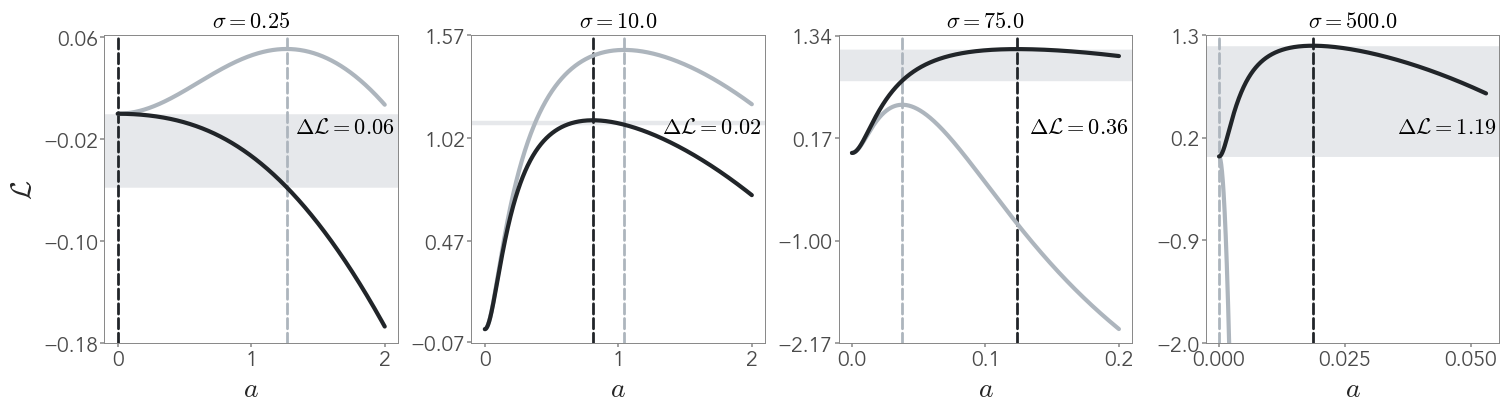

In [145]:
fig, axs = plt.subplots(1, 4, figsize = (18, 4))
axs[-1].set_ylim(-2, 1.3)
plt.subplots_adjust(wspace = 0.25)

for i, sigma in enumerate(sigma_array):
    a_array = np.linspace(0, amax_array[i], 1000)
    L_exact = -(1-Lambda)*fa.Sdota_exact(sigma, a_array, theta_eta) + Lambda*fa.Iyeta_exact(sigma, a_array, theta_eta)
    L_eff = -(1-Lambda)*fa.Sxy_exact(sigma, a_array, theta_eta) + Lambda*fa.Ixy_exact(sigma, a_array, theta_eta)

    axs[i].plot(a_array, L_exact, label = 'Exact', color = "#212529", lw = 3, zorder = 10)
    axs[i].plot(a_array, L_eff, label = 'Effective', color = "#adb5bd", lw = 3, zorder = 9)

    axs[i].axvline(a_array[np.argmax(L_exact)], color = '#212529', linestyle = '--', lw = 2)
    axs[i].axvline(a_array[np.argmax(L_eff)], color = '#adb5bd', linestyle = '--', lw = 2)

    axs[i].set_title(r'$\sigma = {}$'.format(sigma), fontsize = 16)
    axs[i].set_xlabel(r'$a$', fontsize = 20)

    Lexact_astar = np.max(L_exact)
    Lexact_aeff = L_exact[np.argmax(L_eff)]

    xlims = axs[i].get_xlim()
    xspace = np.linspace(xlims[0], xlims[1], 1000)

    axs[i].fill_between(xspace, Lexact_aeff, Lexact_astar, color = '#adb5bd', alpha = 0.3, lw = 0)
    axs[i].set_xlim(xlims)

    # set four ticks in the y axis
    ylims = axs[i].get_ylim()
    yticks = np.round(np.linspace(ylims[0], ylims[1], 4), 2)
    axs[i].set_yticks(yticks)

    # add text at the top right of the filled area
    axs[i].text(0.65, 0.68, r'$\Delta \mathcal{{L}}  = {:.2f}$'.format(Lexact_astar - Lexact_aeff), transform = axs[i].transAxes, fontsize = 16)

axs[0].set_ylabel(r'$\mathcal{L}$', fontsize = 20)
axs[-1].set_xticks([0, 0.025, 0.05])

plt.savefig('../figures/SM/SM_functionals.svg', bbox_inches = 'tight')
plt.show()

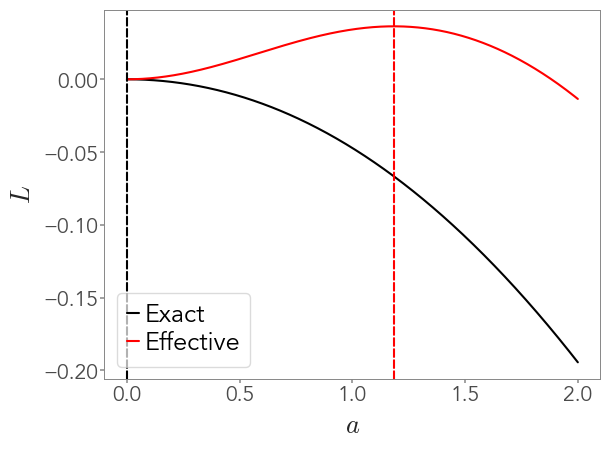

In [35]:


plt.plot(a_array, L_exact, label = 'Exact', color = 'black')
plt.plot(a_array, L_eff, label = 'Effective', color = 'red')

plt.axvline(a_array[np.argmax(L_exact)], color = 'black', linestyle = '--')
plt.axvline(a_array[np.argmax(L_eff)], color = 'red', linestyle = '--')

plt.legend()

plt.xlabel(r'$a$')
plt.ylabel(r'$L$')

plt.show()

Text(0, 0.5, '$L$')

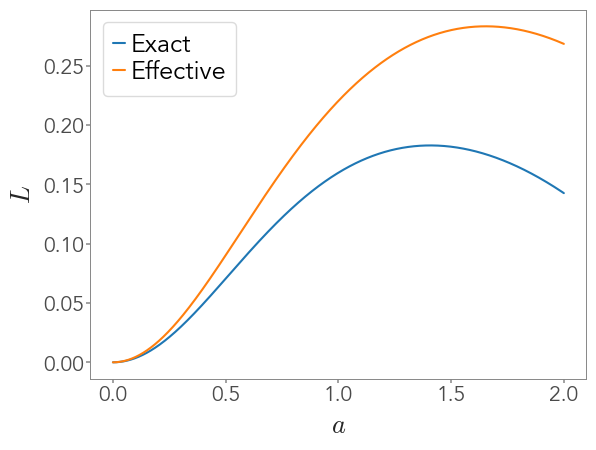